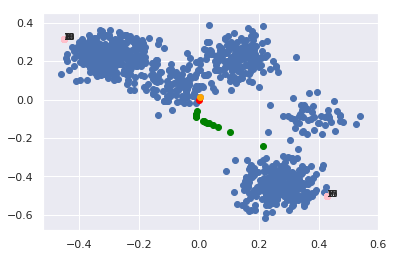

In [106]:
import imports

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; 
sns.set(
#    style="ticks", 
    color_codes=True, 
    style="darkgrid"
)

from datasets import testloader
from initialisations import skmi2020 as skmi
from kmeans import distance_table
from metrics import accuracy
import nbutils

dataset = testloader._load_local('5_2_1000_r_1.5_010')
# dataset = testloader._load_local('skmi_test')
data = dataset.data
target = dataset.target

C = []
K = 20


def _find_awesome_centroid(data):
    """The sexiest point"""
    
    # Data grand mean
    meanie2 = np.mean(data, axis=0)

    # Sum of distances to all other x_i \in X
    distances = distance_table(data, data)
    sum_dist = np.sum(distances, axis=1)  # doesn't matter which axis
    
    # Distances to data grand mean
    distances_mean = distance_table(np.array([meanie2]), data)[0]
    # print(distances_mean)

    THETA = 100 #-0.0000000005
    
    obj = sum_dist / ((distances_mean) * -THETA)

    # print("SD:\n", sum_dist)
    # print("DM:\n", distances_mean)
    # print("OF:\n", obj)
    
    return data[np.argmin(obj)]


HDP = _find_awesome_centroid(data)

# print(HDP)

# plt.figure(figsize=(5, 4))

my_c = None
# my_c = target

# the main data
plt.scatter(data[:, 0], data[:, 1], c=my_c)

# Data grand mean
meanie = np.mean(data, axis=0)
plt.scatter(meanie[0], meanie[1], c='red')

# My cool points
plt.scatter(HDP[0], HDP[1], c='orange')

my_temp_centroids = np.array([HDP])

# My distraction 1
my_dd = distance_table(my_temp_centroids, data)
my_weird_one = data[np.argmax(my_dd)]
plt.scatter(my_weird_one[0], my_weird_one[1], c='pink')

my_temp_centroids = np.vstack((my_temp_centroids, my_weird_one))

# My distraction ->
while len(my_temp_centroids) < K:
    
    # print("I am looping because", len(my_temp_centroids), "<", K)
    
    latest_mean = np.mean(my_temp_centroids, axis=0)
    # print(latest_mean)
    plt.scatter(latest_mean[0], latest_mean[1], c='green')

    my_dd = distance_table(np.array([latest_mean]), data)
    my_weird_one = data[np.argmax(my_dd)]
    plt.scatter(my_weird_one[0], my_weird_one[1], c='pink')
    plt.text(my_weird_one[0], my_weird_one[1], len(my_temp_centroids), fontsize=9)
    
    my_temp_centroids = np.vstack((my_temp_centroids, my_weird_one))

# plt.tight_layout()
plt.show()

In [104]:
# nbutils.run_clustering(skmi)